In [61]:
# Import Dependencies
#import gmaps
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime




In [87]:
# Create a reference the CSV file desired
# Data Source - https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
csv_path = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

# Read the CSV into a Pandas DataFrame
covid_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
covid_df.head()



#renamed fips to zip code
covid_df = covid_df.rename(columns={"fips":"zipcode"})

#changing the zipcode data type to int, running into ValueError with NAN #TBD
#covid_df= covid_df.astype({"zipcode": int})

covid_df.columns

# Extract only NC data 
covid_nc= covid_df.loc[(covid_df["state"] == "North Carolina")]
#covid_county.groupby("state")
covid_nc.head()

,date,county,state,zipcode,cases,deaths
483,2020-03-03,Wake,North Carolina,37183.0,1,0
520,2020-03-04,Wake,North Carolina,37183.0,1,0
567,2020-03-05,Wake,North Carolina,37183.0,1,0
630,2020-03-06,Chatham,North Carolina,37037.0,1,0
631,2020-03-06,Wake,North Carolina,37183.0,1,0


In [27]:
#column data types
covid_county.columns

Index(['date', 'county', 'state', 'zipcode', 'cases', 'deaths'], dtype='object')

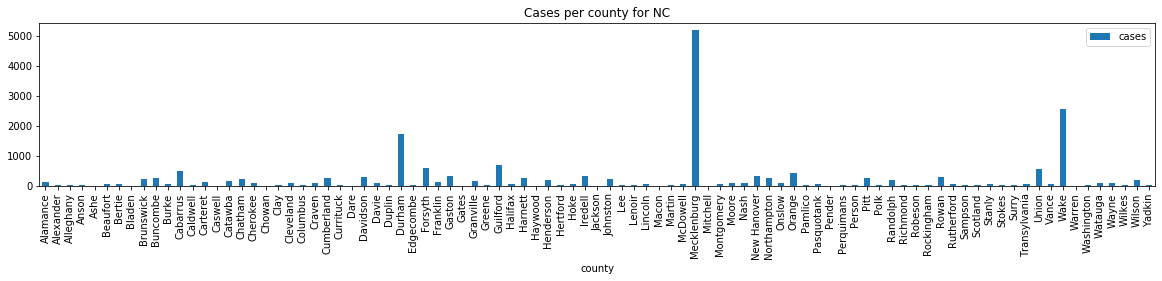

<Figure size 432x288 with 0 Axes>

In [45]:
covid_groupby_county_cases = pd.DataFrame(covid_nc.groupby("county").sum()["cases"])
covid_groupby_county_cases

# Plot the total number of cases per county
covid_groupby_county_cases.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Cases per county for NC")

plt.show()
plt.tight_layout()

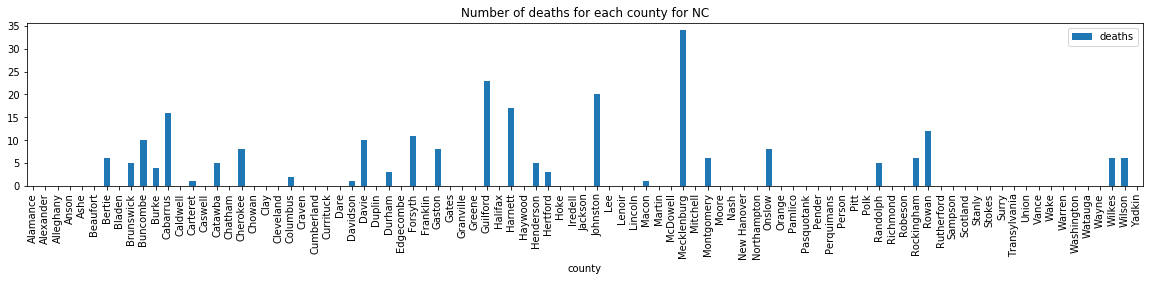

Index(['deaths'], dtype='object')

<Figure size 432x288 with 0 Axes>

In [91]:
# TBD , only plot where deaths > 0
covid_groupby_county_deaths = pd.DataFrame(covid_nc.groupby("county").sum()["deaths"])
covid_groupby_county_deaths.columns

# Plot the total number of deaths per county
covid_groupby_county_deaths.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Number of deaths for each county for NC")

plt.show()
plt.tight_layout()


The r-value is: 0.5102209647444395


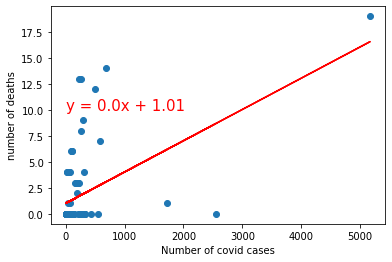

In [54]:
# Correlation between number of cases and deaths in NC counties

# Plot linear regression graph # TBD

x_values = covid_groupby_county_cases['cases']
y_values = covid_groupby_county_deaths['deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Number of covid cases')
plt.ylabel('number of deaths')
print(f"The r-value is: {rvalue}")
plt.show()


In [84]:
# Question: Date of the first case in each county #TBD


# Convert date to a python date object
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y-%m-%d')
#print('Date:', date_time_obj.date())

covid_df.head()
#covid_df.dtypes
covid_df_sortby_date = covid_df.sort_values('date')
covid_df_sortby_date.head()

covid_df_groupby_state_county= pd.DataFrame(covid_df_sortby_date.groupby(["state","county"]).sum()["deaths"])
covid_df_groupby_state_county.head()





deaths
state   county         
Alabama Autauga       0
        Baldwin       5
        Barbour       0
        Bibb          0
        Blount        0

In [ ]:
# Heat maps - number of deaths per state in the US ( stretch goal -sequential data )
# TBD
# Graph the rate since this is a time series data